In [3]:
%reset -f


In [4]:
## 1) 데이터셋 생성하기
import pandas as pd

# 데이터를 DataFrame으로 생성하기 위한 사전 작업
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
    'Temperature': ['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool', 'mild', 'cool', 'mild', 'mild', 'mild', 'hot', 'mild'],
    'Humidity': ['high', 'high', 'high', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'high'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'Play': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

# DataFrame 생성
df = pd.DataFrame(data)

# DataFrame 출력
print(df)


     Outlook Temperature Humidity  Windy Play
0      Sunny         hot     high  False   no
1      Sunny         hot     high   True   no
2   Overcast         hot     high  False  yes
3      Rainy        mild     high  False  yes
4      Rainy        cool   normal  False  yes
5      Rainy        cool   normal   True   no
6   Overcast        cool   normal   True  yes
7      Sunny        mild     high  False   no
8      Sunny        cool   normal  False  yes
9      Rainy        mild   normal  False  yes
10     Sunny        mild   normal   True  yes
11  Overcast        mild     high   True  yes
12  Overcast         hot   normal  False  yes
13     Rainy        mild     high   True   no


In [5]:
## 2) 구분 속성이 없을 때의 정보의 양 (엔트로피) 계산
import numpy as np

def entropy(target_col):
    ele, cnts = np.unique(target_col, return_counts=True)
    entropy = -np.sum([(cnt / np.sum(cnts)) * np.log2(cnt / np.sum(cnts)) for cnt in cnts])
    return entropy

# Play를 기준으로 한 정보의 양 계산
play_entropy = entropy(df['Play'])
print(f"Play를 기준으로 한 정보의 양: {play_entropy:.4f} bits")


Play를 기준으로 한 정보의 양: 0.9403 bits


In [6]:
## 3) Root에 각 특성을 선택하였을 경우의 Information Gain 계산

def info_gain(data, split_attr, target_name="Play"):  # 완성해야 할 함수
    # 전체 엔트로피 계산
    total_entropy = entropy(data[target_name])

    # 삭감할 엔트로피 계산
    ele, cnt = np.unique(data[split_attr], return_counts=True)
    entropy_reduction = np.sum([(cnt[i] / np.sum(cnt)) * entropy(data.where(data[split_attr] == ele[i]).dropna()[target_name]) for i in range(len(ele))])

    # 정보 이득 계산
    information_gain = total_entropy - entropy_reduction
    return information_gain

# 특성별 정보 이득 계산
features = ['Outlook', 'Temperature', 'Humidity', 'Windy']
target = "Play"
gains = {feature: info_gain(df, feature, target) for feature in features}
for feature, gain in gains.items():
    print(f"Information Gain for {feature}: {gain:.4f} bits")

# 최대 정보 이득을 가진 특성 찾기
max_gain_feature = max(gains, key=gains.get)
print(f"\n가장 높은 정보 이득을 가진 특성: {max_gain_feature} with an Information Gain of: {gains[max_gain_feature]:.4f}")


Information Gain for Outlook: 0.2467 bits
Information Gain for Temperature: 0.0292 bits
Information Gain for Humidity: 0.1518 bits
Information Gain for Windy: 0.0481 bits

가장 높은 정보 이득을 가진 특성: Outlook with an Information Gain of: 0.2467


In [7]:
## 4-1) (3)에서 선택된 root에 대해 branch별로 최상의 특징 찾아내기: Part1

unique_values = np.unique(df[max_gain_feature])

sub_data1 = df[df[max_gain_feature] == unique_values[0]]
print(sub_data1)

sub_data1_entropy = entropy(sub_data1['Play'])
print(f"\n{unique_values[0]} branch에서 Play를 기준으로 한 정보의 양: {sub_data1_entropy:.4f} bits")

sub_data1_decision = np.unique(sub_data1['Play'])
print("Decision = ", sub_data1_decision[0])   # 왜 [0]을 쓰는지 잘 관찰하라.

# 본 예제에서는 정보의 양이 0bits이므로
# 불확실성이 남아있지 않아 더 이상 계산이 필요없다
# 추가 계산은 다음 셀로 넘어가서 수행한다


     Outlook Temperature Humidity  Windy Play
2   Overcast         hot     high  False  yes
6   Overcast        cool   normal   True  yes
11  Overcast        mild     high   True  yes
12  Overcast         hot   normal  False  yes

Overcast branch에서 Play를 기준으로 한 정보의 양: -0.0000 bits
Decision =  yes


In [8]:
## 4-2) (3)에서 선택된 root에 대해 branch별로 최상의 특징 찾아내기: Part2

sub_data2 = df[df[max_gain_feature] == unique_values[1]]
print(sub_data2)

sub_data2_entropy = entropy(sub_data2['Play'])
print(f"\n{unique_values[1]} branch에서 Play를 기준으로 한 정보의 양: {sub_data2_entropy:.4f} bits")

sub_features2 = ['Outlook', 'Temperature', 'Humidity', 'Windy']
sub_features2.remove(max_gain_feature)

target = "Play"
gains = {feature: info_gain(sub_data2, feature, target) for feature in features}
for feature, gain in gains.items():
    print(f"\tInformation Gain for {feature}: {gain:.4f} bits")

# 최대 정보 이득을 가진 특성 찾기
max_gain_feature2 = max(gains, key=gains.get)
print(f"\n가장 높은 정보 이득을 가진 특성: {max_gain_feature2}")


   Outlook Temperature Humidity  Windy Play
3    Rainy        mild     high  False  yes
4    Rainy        cool   normal  False  yes
5    Rainy        cool   normal   True   no
9    Rainy        mild   normal  False  yes
13   Rainy        mild     high   True   no

Rainy branch에서 Play를 기준으로 한 정보의 양: 0.9710 bits
	Information Gain for Outlook: 0.0000 bits
	Information Gain for Temperature: 0.0200 bits
	Information Gain for Humidity: 0.0200 bits
	Information Gain for Windy: 0.9710 bits

가장 높은 정보 이득을 가진 특성: Windy


In [9]:
## 4-3) (3)에서 선택된 root에 대해 branch별로 최상의 특징 찾아내기: Part3

sub_data3 = df[df[max_gain_feature] == unique_values[2]]
print(sub_data3)

sub_data3_entropy = entropy(sub_data3['Play'])
print(f"\nPlay를 기준으로 한 정보의 양: {sub_data3_entropy:.4f}")

sub_features3 = ['Outlook', 'Temperature', 'Humidity', 'Windy']
sub_features3.remove(max_gain_feature)

target = "Play"
gains = {feature: info_gain(sub_data3, feature, target) for feature in features}
for feature, gain in gains.items():
    print(f"\tInformation Gain for {feature}: {gain:.4f} bits")

# 최대 정보 이득을 가진 특성 찾기
max_gain_feature3 = max(gains, key=gains.get)
print(f"\n가장 높은 정보 이득을 가진 특성: {max_gain_feature3}")


   Outlook Temperature Humidity  Windy Play
0    Sunny         hot     high  False   no
1    Sunny         hot     high   True   no
7    Sunny        mild     high  False   no
8    Sunny        cool   normal  False  yes
10   Sunny        mild   normal   True  yes

Play를 기준으로 한 정보의 양: 0.9710
	Information Gain for Outlook: 0.0000 bits
	Information Gain for Temperature: 0.5710 bits
	Information Gain for Humidity: 0.9710 bits
	Information Gain for Windy: 0.0200 bits

가장 높은 정보 이득을 가진 특성: Humidity


In [10]:
## 5-1) 정보 이득을 기반으로 Decision Tree를 재귀적으로 구축하기: 트리 노드 정의
# 본 셀은 수정할 필요가 없다.

class Node:
    def __init__(self, feature=None, value=None, children=None):
        self.feature = feature          # Intermediate (or Root)일 경우: 분기 기준이 되는 특성
        self.children = children or {}  # Intermediate (or Root)일 경우: 자식 노드를 저장하는 딕셔너리
        self.value = value              # Leaf일 경우: 예측값

    def is_leaf(self):
        return self.value is not None


In [11]:
## 5-2) 정보 이득을 기반으로 Decision Tree를 재귀적으로 구축하기: 트리 구축 함수 작성하기

def build_tree_with_info_gain(data, target, features, depth=0, max_depth=5):
    if len(data[target].unique()) == 1 or depth == max_depth or len(data) < 2:
        # 모든 데이터가 한 클래스에 속하거나 최대 깊이에 도달하거나 데이터가 충분하지 않을 경우
        return Node(value=data[target].mode()[0])

    # 각 특성의 정보 이득 계산: 위 코드를 참고로 하여 정보 이득을 계산하고 최고의 특성을 선택하라
    gains = {feature: info_gain(data, feature, target) for feature in features}
    best_feature = max(gains, key=gains.get)

    # 최상의 특성으로 데이터 분할
        # 불확실성이 제거되었을 경우: Leaf 노드 생성 구문
    if gains[best_feature] == 0:
        return Node(value=data[target].mode()[0])    # 가장 빈도가 높은 데이터로 노드 생성

        # 불확실성이 제거되지 않았을 경우: Subtree 생성 구문
    node = Node(feature=best_feature)
    unique_values = data[best_feature].unique()

    for value in unique_values:       # 선택된 feature의 모든 attribute에 대해 subtree
        sub_data = data[data[best_feature] == value]    # attribute이 일치하는 데이터만 추출
        if not sub_data.empty:
            sub_features = [f for f in features if f != best_feature]
            node.children[value] = build_tree_with_info_gain(sub_data, target, sub_features, depth + 1, max_depth)

    return node


In [12]:
## 5-3) 정보 이득을 기반으로 Decision Tree를 재귀적으로 구축하기: 트리 구축 및 출력

def print_tree(node, depth=0):
    prefix = " " * (depth * 4)
    if node.is_leaf():
        print(prefix + f"Leaf: Predict {node.value}")
    else:
        print(prefix + f"[{node.feature}]")
        for value, child in node.children.items():
            print(prefix + f" -> {value}:")
            print_tree(child, depth + 1)

# 데이터 로드 및 초기화
df = pd.DataFrame(data)  # data는 위에서 정의한 딕셔너리
features = list(df.columns)
features.remove('Play')

# 트리 구축
tree1 = build_tree_with_info_gain(df, 'Play', features, max_depth=3)

# 트리 시각화
print_tree(tree1)


[Outlook]
 -> Sunny:
    [Humidity]
     -> high:
        Leaf: Predict no
     -> normal:
        Leaf: Predict yes
 -> Overcast:
    Leaf: Predict yes
 -> Rainy:
    [Windy]
     -> False:
        Leaf: Predict yes
     -> True:
        Leaf: Predict no


In [13]:
## 5-4) 다른 예제에 트리구축 하기
import pandas as pd

# 데이터를 DataFrame으로 생성
data_worst = {
    'ID code': ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n'],
    'Outlook': ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy'],
    'Temperature': ['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool', 'mild', 'cool', 'mild', 'mild', 'mild', 'hot', 'mild'],
    'Humidity': ['high', 'high', 'high', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'high'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'Play': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

# DataFrame 생성
df_worst = pd.DataFrame(data_worst)

# DataFrame 출력
print(df_worst)
features = list(df_worst.columns)
features.remove('Play')

# 트리 구축
tree_worst = build_tree_with_info_gain(df_worst, 'Play', features, max_depth=3)

# 트리 시각화
print_tree(tree_worst)


   ID code   Outlook Temperature Humidity  Windy Play
0        a     sunny         hot     high  False   no
1        b     sunny         hot     high   True   no
2        c  overcast         hot     high  False  yes
3        d     rainy        mild     high  False  yes
4        e     rainy        cool   normal  False  yes
5        f     rainy        cool   normal   True   no
6        g  overcast        cool   normal   True  yes
7        h     sunny        mild     high  False   no
8        i     sunny        cool   normal  False  yes
9        j     rainy        mild   normal  False  yes
10       k     sunny        mild   normal   True  yes
11       l  overcast        mild     high   True  yes
12       m  overcast         hot   normal  False  yes
13       n     rainy        mild     high   True   no
[ID code]
 -> a:
    Leaf: Predict no
 -> b:
    Leaf: Predict no
 -> c:
    Leaf: Predict yes
 -> d:
    Leaf: Predict yes
 -> e:
    Leaf: Predict yes
 -> f:
    Leaf: Predict no
 -> g:
  

In [14]:
## 6) Gain Ratio를 이용하여 트리 생성하기

def split_info(data, feature):
    values, counts = np.unique(data[feature], return_counts=True)
    total_count = np.sum(counts)
    split_info = -np.sum([(count / total_count) * np.log2(count / total_count) if count != 0 else 0 for count in counts])
    return split_info

def gain_ratio(data, feature, target):
    ig = info_gain(data, feature, target)
    si = split_info(data, feature)
    return ig / si if si != 0 else 0  # 분할 정보가 0이 아닐 때만 계산


def build_tree_with_gain_ratio(data, target, features, max_depth, depth=0):
    if len(data[target].unique()) == 1 or depth == max_depth or len(data) < 2:
        return Node(value=data[target].mode()[0])

    # 각 특성의 정보 이득 비율 계산
    gains = {feature: gain_ratio(data, feature, target) for feature in features}
    best_feature = max(gains, key=gains.get)

    # 최적의 특성으로 데이터 분할
    if gains[best_feature] == 0:
        return Node(value=data[target].mode()[0])

    node = Node(feature=best_feature)
    unique_values = data[best_feature].unique()
    for value in unique_values:
        sub_data = data[data[best_feature] == value]
        if not sub_data.empty:
            sub_features = [f for f in features if f != best_feature]
            node.children[value] = build_tree_with_gain_ratio(sub_data, target, sub_features, depth + 1, max_depth)

    return node

# 데이터 로드 및 초기화
df = pd.DataFrame(data_worst)  # data는 위에서 정의한 딕셔너리
features = list(df.columns)
features.remove('Play')

# 트리 구축
tree2 = build_tree_with_gain_ratio(df, 'Play', features, max_depth=3)

# 트리 시각화
print_tree(tree2)


[ID code]
 -> a:
    Leaf: Predict no
 -> b:
    Leaf: Predict no
 -> c:
    Leaf: Predict yes
 -> d:
    Leaf: Predict yes
 -> e:
    Leaf: Predict yes
 -> f:
    Leaf: Predict no
 -> g:
    Leaf: Predict yes
 -> h:
    Leaf: Predict no
 -> i:
    Leaf: Predict yes
 -> j:
    Leaf: Predict yes
 -> k:
    Leaf: Predict yes
 -> l:
    Leaf: Predict yes
 -> m:
    Leaf: Predict yes
 -> n:
    Leaf: Predict no


In [15]:
## 7-1) 다른 훈련 세트에 대해 트리 생성하기
# 데이터 딕셔너리 생성
midterm2_data = {
    'Supervisor': ['Pat', 'Pat', 'Tom', 'Pat', 'Sally', 'Tom', 'Tom', 'Pat'],
    'Operator': ['Joe', 'Sam', 'Jim', 'Jim', 'Joe', 'Sam', 'Joe', 'Jim'],
    'Machine': ['A', 'B', 'B', 'B', 'C', 'C', 'C', 'A'],
    'Overtime': ['No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes'],
    'Output': ['High', 'Low', 'Low', 'High', 'High', 'Low', 'Low', 'Low']
}

# 데이터프레임 생성
df2 = pd.DataFrame(midterm2_data)

# 데이터프레임 출력
print(df2)
features = list(df2.columns)
features.remove('Output')

# 트리 구축: 정보 이득
print("\nDecision Tree by Information Gain")
tree3 = build_tree_with_info_gain(df2, 'Output', features, max_depth=3)
print_tree(tree3)

# 트리 구축: 이득 비율
print("\nDecision Tree by Gain Ratio")
tree4 = build_tree_with_gain_ratio(df2, 'Output', features, max_depth=3)
print_tree(tree4)


  Supervisor Operator Machine Overtime Output
0        Pat      Joe       A       No   High
1        Pat      Sam       B      Yes    Low
2        Tom      Jim       B      Yes    Low
3        Pat      Jim       B       No   High
4      Sally      Joe       C       No   High
5        Tom      Sam       C       No    Low
6        Tom      Joe       C       No    Low
7        Pat      Jim       A      Yes    Low

Decision Tree by Information Gain
[Supervisor]
 -> Pat:
    [Overtime]
     -> No:
        Leaf: Predict High
     -> Yes:
        Leaf: Predict Low
 -> Tom:
    Leaf: Predict Low
 -> Sally:
    Leaf: Predict High

Decision Tree by Gain Ratio
[Overtime]
 -> No:
    [Supervisor]
     -> Pat:
        Leaf: Predict High
     -> Sally:
        Leaf: Predict High
     -> Tom:
        Leaf: Predict Low
 -> Yes:
    Leaf: Predict Low


In [16]:
## 7-2) 다른 훈련 세트에 대해 트리 생성하기
# 데이터 딕셔너리 생성
midterm2_data2 = {
    'ID Code': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'],
    'Supervisor': ['Pat', 'Pat', 'Tom', 'Pat', 'Sally', 'Tom', 'Tom', 'Pat'],
    'Operator': ['Joe', 'Sam', 'Jim', 'Jim', 'Joe', 'Sam', 'Joe', 'Jim'],
    'Machine': ['A', 'B', 'B', 'B', 'C', 'C', 'C', 'A'],
    'Overtime': ['No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes'],
    'Output': ['High', 'Low', 'Low', 'High', 'High', 'Low', 'Low', 'Low']
}

# 데이터프레임 생성
df2 = pd.DataFrame(midterm2_data2)

# 데이터프레임 출력
print(df2)
features = list(df2.columns)
features.remove('Output')

# 트리 구축: 정보 이득
print("\nDecision Tree by Information Gain")
tree3 = build_tree_with_info_gain(df2, 'Output', features, max_depth=3)
print_tree(tree3)

# 트리 구축: 이득 비율
print("\nDecision Tree by Gain Ratio")
tree4 = build_tree_with_gain_ratio(df2, 'Output', features, max_depth=3)
print_tree(tree4)


  ID Code Supervisor Operator Machine Overtime Output
0       A        Pat      Joe       A       No   High
1       B        Pat      Sam       B      Yes    Low
2       C        Tom      Jim       B      Yes    Low
3       D        Pat      Jim       B       No   High
4       E      Sally      Joe       C       No   High
5       F        Tom      Sam       C       No    Low
6       G        Tom      Joe       C       No    Low
7       H        Pat      Jim       A      Yes    Low

Decision Tree by Information Gain
[ID Code]
 -> A:
    Leaf: Predict High
 -> B:
    Leaf: Predict Low
 -> C:
    Leaf: Predict Low
 -> D:
    Leaf: Predict High
 -> E:
    Leaf: Predict High
 -> F:
    Leaf: Predict Low
 -> G:
    Leaf: Predict Low
 -> H:
    Leaf: Predict Low

Decision Tree by Gain Ratio
[Overtime]
 -> No:
    [Supervisor]
     -> Pat:
        Leaf: Predict High
     -> Sally:
        Leaf: Predict High
     -> Tom:
        Leaf: Predict Low
 -> Yes:
    Leaf: Predict Low


In [17]:
## 8) 트리 시각화

import graphviz

def visualize_tree(node):
    def render(node, dot=None):
        if dot is None:
            dot = graphviz.Digraph()
            dot.attr('node', shape='ellipse')

        if node.is_leaf():
            # 리프 노드: 사각형으로 표시
            node_id = str(id(node))
            dot.node(node_id, label=str(node.value), shape='box')
        else:
            # 분기 노드: 타원형으로 표시
            node_id = str(id(node))
            label = "{}".format(node.feature)
            dot.node(node_id, label=label)

            # 자식 노드에 대한 처리
            for value, child in node.children.items():
                child_id = str(id(child))
                render(child, dot)
                dot.edge(node_id, child_id, label=str(value))

        return dot

    # 트리의 루트 노드부터 그래프 생성 시작
    dot = render(node)
    return dot

# 트리 시각화
dot = visualize_tree(tree1)
dot.render('decision_tree_1', view=True)
dot = visualize_tree(tree2)
dot.render('decision_tree_2', view=True)
dot = visualize_tree(tree3)
dot.render('decision_tree_3', view=True)
dot = visualize_tree(tree4)
dot.render('decision_tree_4', view=True)


'decision_tree_4.pdf'

In [18]:
## 9) Numeric Attribute에 대한 학습 수행

def find_best_split(data, feature, target):
    unique_values = sorted(data[feature].unique())
    best_threshold = None
    best_gain_ratio = -np.inf

    for i in range(1, len(unique_values)):
        threshold = (unique_values[i-1] + unique_values[i]) / 2
        left_data = data[data[feature] <= threshold]
        right_data = data[data[feature] > threshold]
        if not left_data.empty and not right_data.empty:
            current_gain_ratio = calc_gain_ratio(data, feature, target, threshold)
            if current_gain_ratio > best_gain_ratio:
                best_gain_ratio = current_gain_ratio
                best_threshold = threshold

    return best_threshold, best_gain_ratio

def calc_gain_ratio(data, feature, target, threshold=None):
    if threshold is None:
        # Categorical feature
        return gain_ratio(data, feature, target)
    else:
        # Numeric feature
        left_data = data[data[feature] <= threshold]
        right_data = data[data[feature] > threshold]
        total_entropy = entropy(data[target])
        left_entropy = entropy(left_data[target]) if not left_data.empty else 0
        right_entropy = entropy(right_data[target]) if not right_data.empty else 0
        weighted_entropy = (len(left_data) / len(data)) * left_entropy + (len(right_data) / len(data)) * right_entropy
        ig = total_entropy - weighted_entropy
        split_info = -(len(left_data) / len(data)) * np.log2(len(left_data) / len(data)) if len(left_data) > 0 else 0
        split_info -= (len(right_data) / len(data)) * np.log2(len(right_data) / len(data)) if len(right_data) > 0 else 0
        return ig / split_info if split_info != 0 else 0

def build_tree_numeric_with_gain_ratio(data, target, features, max_depth, depth=0):
    if len(data[target].unique()) == 1 or depth == max_depth or len(data) < 2:
        return Node(value=data[target].mode()[0])

    gains = {}
    thresholds = {}
    for feature in features:
        if data[feature].dtype.kind in 'if':  # Check if feature is numeric
            threshold, gain_ratio_temp = find_best_split(data, feature, target)
            gains[feature] = gain_ratio_temp
            thresholds[feature] = threshold
        else:
            gains[feature] = calc_gain_ratio(data, feature, target)

    best_feature = max(gains, key=gains.get)
    if gains[best_feature] == 0:
        return Node(value=data[target].mode()[0])

    node = Node(feature=best_feature)
    if best_feature in thresholds:
        threshold = thresholds[best_feature]
        left_data = data[data[best_feature] <= threshold]
        right_data = data[data[best_feature] > threshold]
        node.children['<= ' + str(threshold)] = build_tree_numeric_with_gain_ratio(left_data, target, features, depth + 1, max_depth)
        node.children['> ' + str(threshold)] = build_tree_numeric_with_gain_ratio(right_data, target, features, depth + 1, max_depth)
    else:
        unique_values = data[best_feature].unique()
        for value in unique_values:
            sub_data = data[data[best_feature] == value]
            if not sub_data.empty:
                sub_features = [f for f in features if f != best_feature]
                node.children[value] = build_tree_numeric_with_gain_ratio(sub_data, target, sub_features, depth + 1, max_depth)

    return node

# 데이터 딕셔너리 생성
data_numeric = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
    'Temperature': [85, 80, 83, 70, 68, 65, 64, 72, 69, 75, 75, 72, 81, 71],
    'Humidity': [85, 90, 86, 96, 80, 70, 65, 95, 70, 80, 70, 90, 75, 91],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'Play': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

# DataFrame 생성
df_numeric = pd.DataFrame(data_numeric)
features = list(df_numeric.columns)
features.remove('Play')

# DataFrame 출력
print(df_numeric)
tree_numeric1 = build_tree_numeric_with_gain_ratio(df_numeric, 'Play', features, max_depth=3)

# 트리 구축: 정보 이득
print("\nNumeric Decision Tree with Numeric Attributes")
print_tree(tree_numeric1)

dot = visualize_tree(tree_numeric1)
dot.render('decision_tree_num1', view=True)

     Outlook  Temperature  Humidity  Windy Play
0      Sunny           85        85  False   no
1      Sunny           80        90   True   no
2   Overcast           83        86  False  yes
3      Rainy           70        96  False  yes
4      Rainy           68        80  False  yes
5      Rainy           65        70   True   no
6   Overcast           64        65   True  yes
7      Sunny           72        95  False   no
8      Sunny           69        70  False  yes
9      Rainy           75        80  False  yes
10     Sunny           75        70   True  yes
11  Overcast           72        90   True  yes
12  Overcast           81        75  False  yes
13     Rainy           71        91   True   no

Numeric Decision Tree with Numeric Attributes
[Temperature]
 -> <= 84.0:
    [Humidity]
     -> <= 88.0:
        [Temperature]
         -> <= 66.5:
            [Outlook]
             -> Rainy:
                Leaf: Predict no
             -> Overcast:
                Leaf: Predi

'decision_tree_num1.pdf'

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


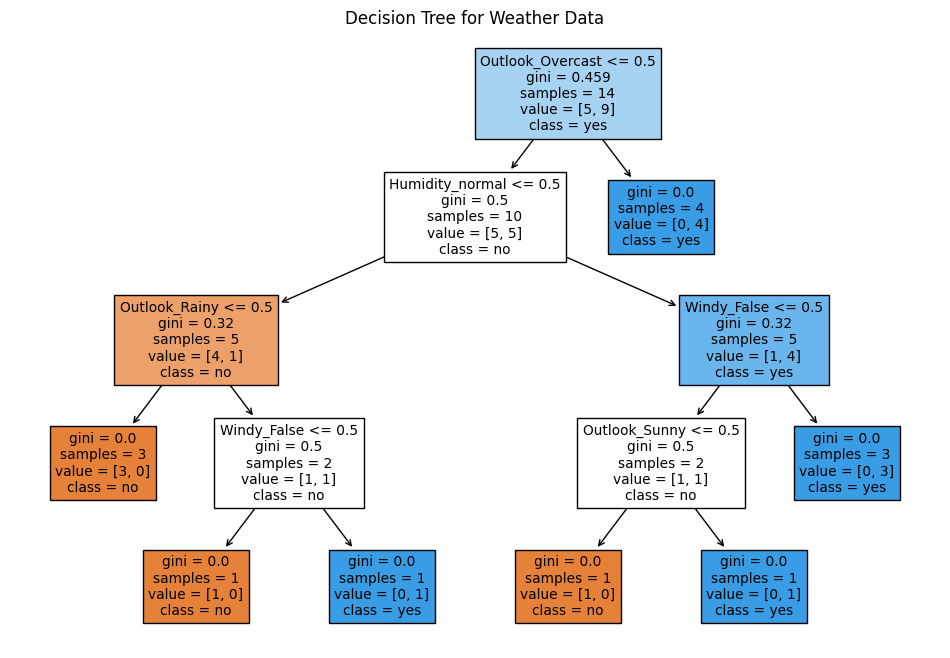

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


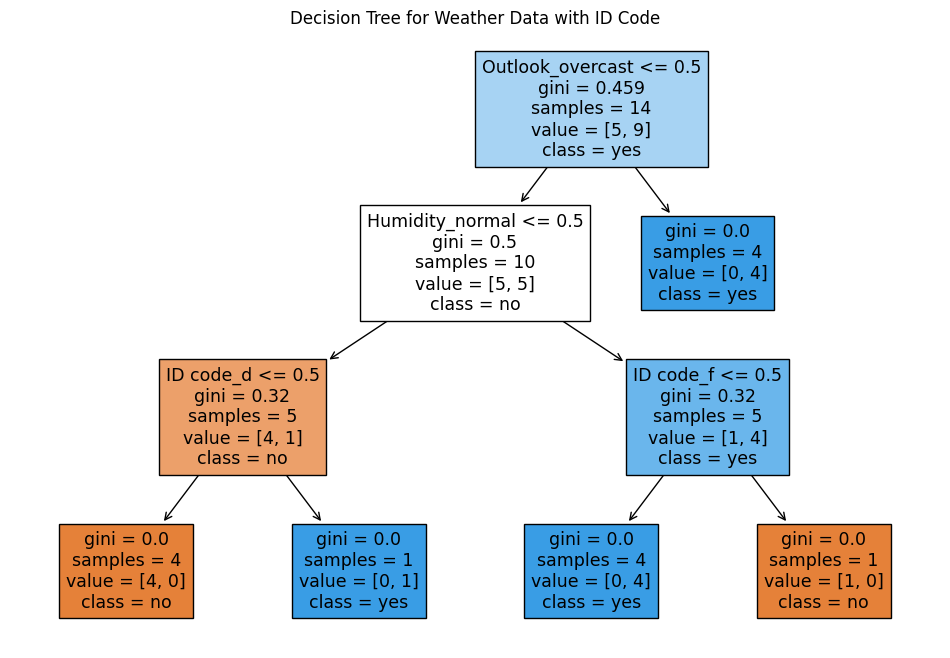

In [34]:
## 10) scikit-learn을 이용한 트리 학습
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

data1 = data
data2 = data_worst

# scikit-learn을 이용한 트리 학습: DataFrame형식의 데이터 변환
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# 인코딩을 위해 OneHotEncoder 사용
encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(df1.drop('Play', axis=1))  # 'Play' 제외한 나머지 feature들을 인코딩

# DataFrame으로 변환
X = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(df1.columns.drop('Play')))
y = df1['Play']

# 의사결정 트리 모델 생성
tree_clf1 = DecisionTreeClassifier(max_depth=10, random_state=42)
tree_clf1.fit(X, y)

# 트리 시각화
plt.figure(figsize=(12, 8))
plot_tree(tree_clf1, filled=True, feature_names=X.columns, class_names=y.unique())
plt.title("Decision Tree for Weather Data")
plt.show()


# 인코딩을 위해 OneHotEncoder 사용
encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(df2.drop('Play', axis=1))  # 'Play' 제외한 나머지 feature들을 인코딩

# DataFrame으로 변환
X = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(df2.columns.drop('Play')))
y = df2['Play']

# 의사결정 트리 모델 생성
tree_clf2 = DecisionTreeClassifier(max_depth=10, random_state=42)
tree_clf2.fit(X, y)

# 트리 시각화
plt.figure(figsize=(12, 8))
plot_tree(tree_clf2, filled=True, feature_names=X.columns, class_names=y.unique())
plt.title("Decision Tree for Weather Data with ID Code")
plt.show()
